In [13]:

import rtree, pygeos
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
import os
import folium

import numpy as np
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
import numpy as np
import statsmodels.api as sm
from datetime import datetime, timedelta

In [14]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [65]:

data_path = 'C:/Users/mhudgell/data/ais/'
telemetry_df = pd.read_parquet(data_path, engine='pyarrow')

In [66]:
telemetry_df =  telemetry_df[['mmsi', 'acquisition_time', 'longitude', 'latitude', 'sog', 'cog']]

In [83]:
local_df = telemetry_df[((telemetry_df['latitude'] > 51.85975370) &  (telemetry_df['latitude'] < 55.34311203)) &
                        ((telemetry_df['longitude'] > -7.33234434) & (telemetry_df['longitude'] < -2.45881019))]                


In [84]:
temp = local_df.groupby(['mmsi']).agg({'mmsi': pd.Series.count})
test = temp[temp['mmsi'] > 10]
test

,mmsi
mmsi,
205071000,122
209066000,99
209093000,66
209146000,135
209192000,191
...,...
636017002,319
636018261,95
636018663,210


In [85]:
local_df = local_df[telemetry_df['mmsi'] == '209146000']        

C:\Users\mhudgell\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


In [86]:
print(len(local_df.index), len(telemetry_df.index))

135 12534115


In [87]:
geometry = [Point(xy) for xy in zip(local_df.longitude, local_df.latitude)]
crs = {'init': 'epsg:4326'} #4326
telemetry_gdf = gpd.GeoDataFrame(local_df, crs=crs, geometry=geometry)



C:\Anaconda3\envs\geo37\lib\site-packages\pyproj\crs\crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


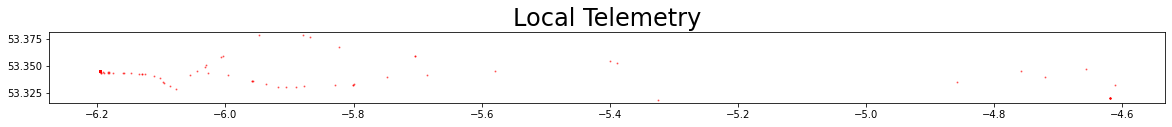

In [88]:

fig, ax = plt.subplots(figsize=(20, 20))
telemetry_gdf.plot(ax=ax, alpha=.5, markersize=1, color='red')
ax.set_title('Local Telemetry', fontsize=24, loc='center')
plt.savefig("C:/Users/mhudgell/figures/local.png")
plt.show()

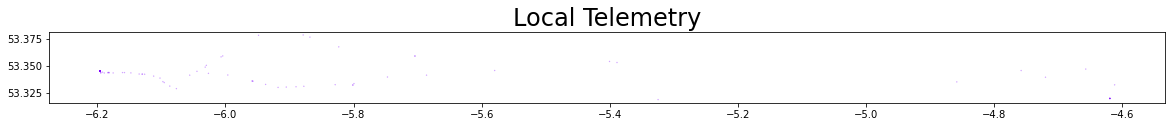

In [89]:
fig, ax = plt.subplots(figsize=(20, 20))
telemetry_gdf.plot(ax=ax, alpha=.5, column='mmsi', cmap='rainbow', legend=False, markersize=0.1)
ax.set_title('Local Telemetry', fontsize=24, loc='center')
plt.savefig("C:/Users/mhudgell/figures/local.png")
plt.show()


#gdf.plot(figsize=(20,10), column='cog', cmap='hot', legend=True, markersize=0.01)

In [90]:
geo_gdf = telemetry_gdf[['mmsi', 'sog', 'cog', 'geometry']]
geo_gdf['lon'] = geo_gdf['geometry'].x
geo_gdf['lat'] = geo_gdf['geometry'].y

C:\Anaconda3\envs\geo37\lib\site-packages\geopandas\geodataframe.py:1322: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super(GeoDataFrame, self).__setitem__(key, value)


In [91]:
geo_gdf

,mmsi,sog,cog,geometry,lon,lat
1034856,209146000,16.9,347.9,POINT (-4.61210 53.33232),-4.612105,53.332317
1034858,209146000,22.2,264.1,POINT (-5.40047 53.35407),-5.400470,53.354070
1034860,209146000,22.3,266.2,POINT (-5.57981 53.34565),-5.579807,53.345647
1034862,209146000,22.3,265.8,POINT (-5.68609 53.34128),-5.686095,53.341277
1034864,209146000,22.1,269.8,POINT (-5.74704 53.33958),-5.747045,53.339577
...,...,...,...,...,...,...
1035116,209146000,22.2,88.8,POINT (-5.80116 53.33212),-5.801162,53.332120
1035118,209146000,22.2,88.8,POINT (-5.80116 53.33212),-5.801162,53.332120
1035120,209146000,22.6,86.2,POINT (-5.32464 53.31856),-5.324640,53.318563
1035122,209146000,21.9,87.6,POINT (-4.85848 53.33504),-4.858485,53.335043


In [99]:
# Setup a folium map at a high-level zoom
map = folium.Map(location=(54,-5), zoom_start=8)

for idx, row in geo_gdf.iterrows():
    folium.Marker( location=[row['lat'], row['lon']], radius=1, popup=(row['cog']+' '+row['sog']), ).add_to(map)
map


In [ ]:
geo_gdf